# **Proyek Pertama : Predictive Analytics**

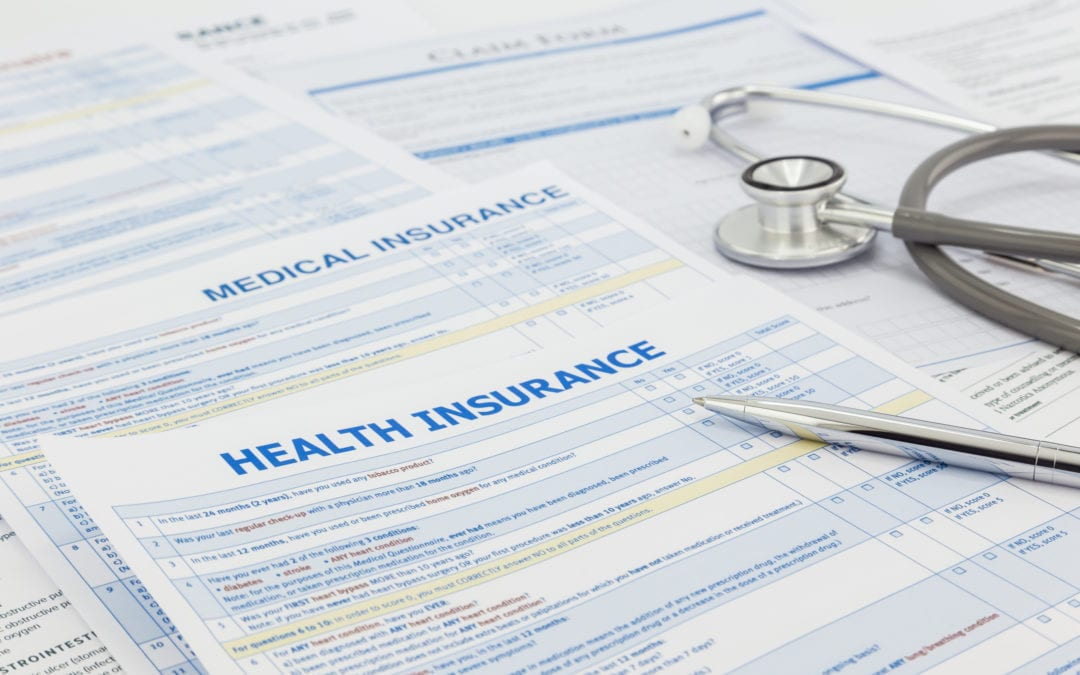



---

Import Library

---



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns



> 1. numpy berfungsi ntuk operasi matematika dan statistik yang efisien, khususnya pada array multidimensi (ndarray)

> 2. matplotlib berfungsi membuat plot dan visualisasi grafik

> 3. pandas berfungsi untuk manipulasi dan analisis data

> 4. seaborn berfungsi untuk membuat  antarmuka yang lebih mudah dan lebih estetis untuk membuat visualisasi statistik yang kompleks.












---

Load Dataset

---



In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Raafikurnia/Dicoding-MachineLearningTerapan/main/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




Keterangan:

```
1.   age: usia individu (dalam tahun)
2.   sex: jenis kelamin individu (male/female)
3.   bmi: body mass index, merupakan  indikator pengukuran yang digunakan untuk menentukan kategori berat badan ideal atau tidak, diperoleh dari berat badan dibagi dengan kuadrat tinggi badan dalam satuan kg/m^2
4.   children: jumlah anak yang diasuransikan
5.   smoker: apakah individu merokok atau tidak (yes/no)
6.   region: kota tempat individu tinggal
7.   charges: biaya asuransi kesehatan yang dibebankan kepada individu

```





## EDA



---
Data Information

---




In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


dataset terdiri atas 7 kolom dengan 2 kolom data yang memiliki tipe float64, 2 kolom data yang memiliki tipe int64, dan 3 data yang memiliki tipe object

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.shape

(1338, 7)

dataset ini memiliki 1338 entri atau contoh dengan 7 fitur atau atribut per entri.



---
Check Missing Value

---




In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



```
# Tidak ada missing value
```





---

Check Outliers

---



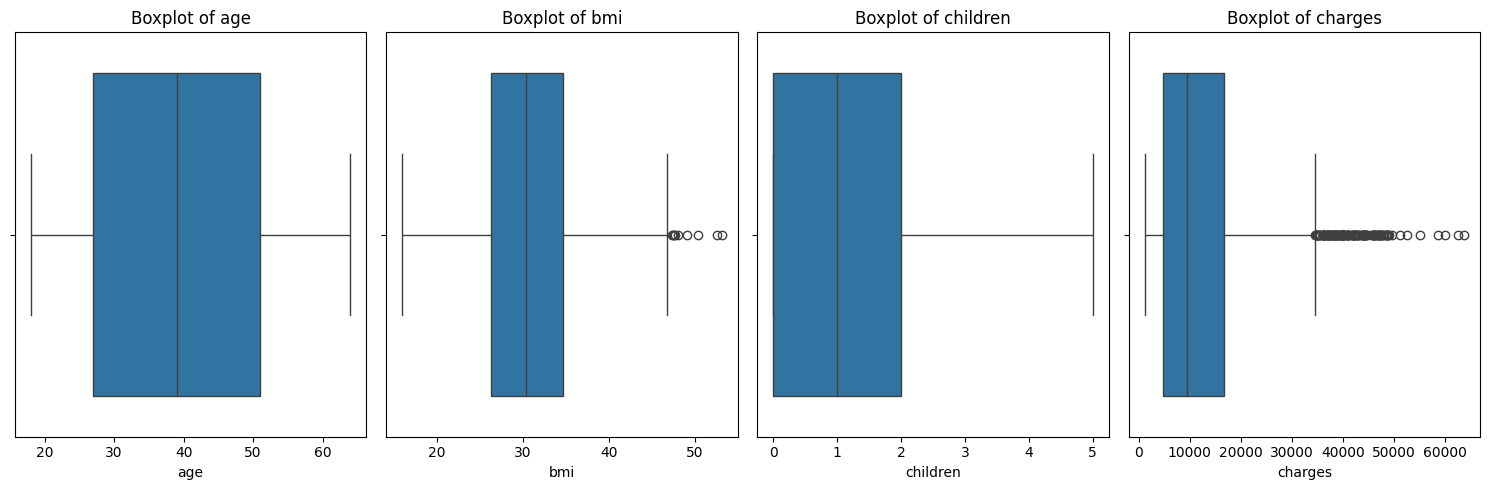

In [8]:
# Definisikan kolom yang ingin divisualisasikan
columns_to_plot = ['age', 'bmi', 'children', 'charges']

# Buat subplot dengan jumlah baris dan kolom sesuai jumlah kolom
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Jika hanya ada satu subplot, axes tidak akan berupa array, jadi kita perlu memastikan
if len(columns_to_plot) == 1:
    axes = [axes]

# Plot boxplot untuk setiap kolom dalam subplot yang sesuai
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Atur tampilan subplot
plt.tight_layout()
plt.show()

Visualisasi outlier pada masing-masing kolom 'age, 'bmi', 'children', dan 'charges'

<Axes: xlabel='age'>

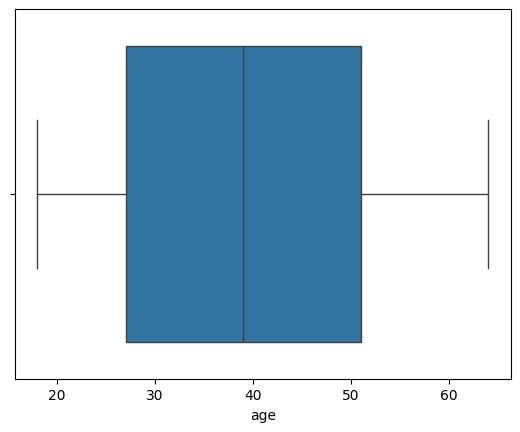

In [9]:
sns.boxplot(x=data['age'])

tidak ada outlier pada kolom 'age'

<Axes: xlabel='bmi'>

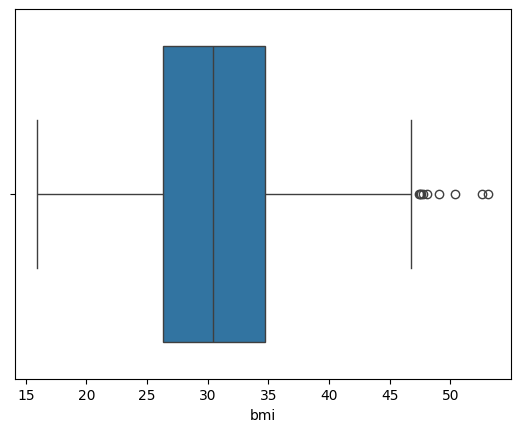

In [10]:
sns.boxplot(x=data['bmi'])

terdapat beberapa outlier pada kolom 'bmi'

<Axes: xlabel='children'>

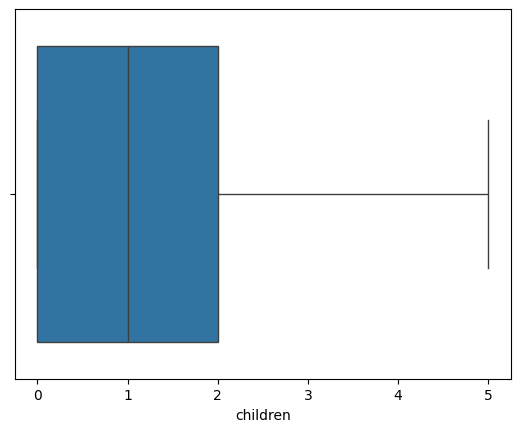

In [11]:
sns.boxplot(x=data['children'])

tidak ada outlier pada kolom 'children'

<Axes: xlabel='charges'>

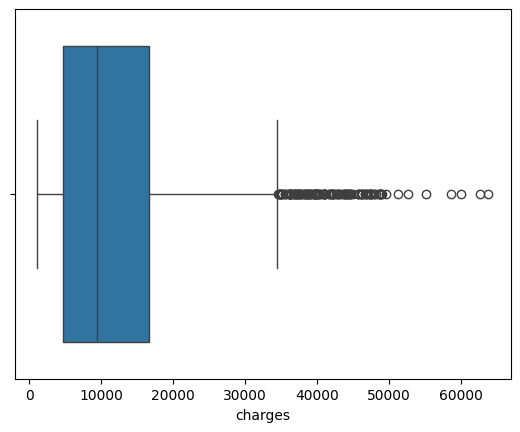

In [12]:
sns.boxplot(x=data['charges'])

terdapat beberapa outlier pada kolom 'charges'

In [13]:
cols = ['bmi', 'charges']
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

# Menggunakan boolean indexing untuk menghapus outlier pada kolom 'bmi' dan 'charges'
data_cleaned = data[~((data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR)))]

# Cek ukuran dataset setelah menghapus outlier
data_cleaned.shape


(1338, 7)



---
Univariae Analysis

---




In [14]:
numerical_features = ['age', 'bmi', 'children', 'charges']
categorical_features = ['sex', 'smoker', 'region']

Dataset ini terdiri dari empat fitur numerik—'age', 'bmi', 'children', dan 'charges' serta tiga fitur kategorikal—'sex', 'smoker', dan 'region'



---

Categorical Features

---



        jumlah sampel  persentase
sex                              
male              676        50.5
female            662        49.5


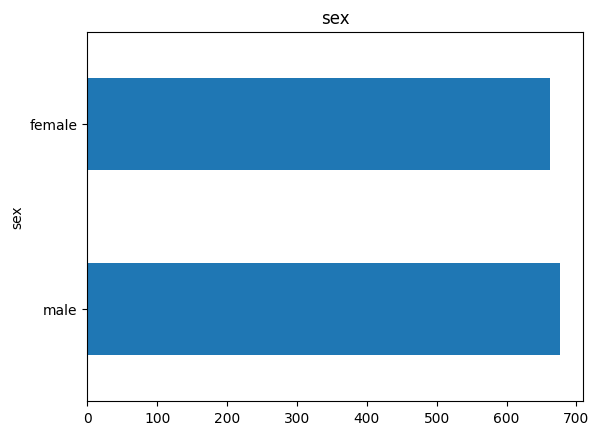

In [15]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='barh', title=feature);



> Dari grafik dapat kita simpulkan bahwa presentase jenis kelamin male dan female tidak jauh berbeda. Dengan jumlah sampel jenis kelamin male sebanyak 676 dan female 662



        jumlah sampel  persentase
smoker                           
no               1064        79.5
yes               274        20.5


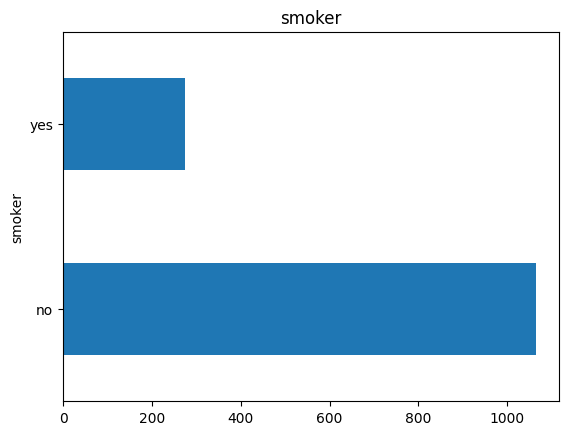

In [16]:
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='barh', title=feature);



> Dari grafik tersebut kita dapat mengetahui bahwa jumlah individu yang tidak merokok jauh lebih mendominasi dari pada jumlah individu yang merokok, dengan perbandingan sebesar 1066 : 274



           jumlah sampel  persentase
region                              
southeast            364        27.2
southwest            325        24.3
northwest            325        24.3
northeast            324        24.2


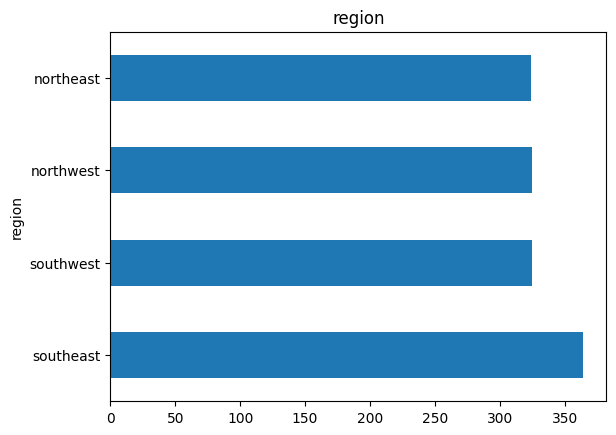

In [17]:
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='barh', title=feature);



> Dari grafik kita bisa mengetahui bahwa region individu paling banyak berasal dari southeast





---

Numerical Features

---



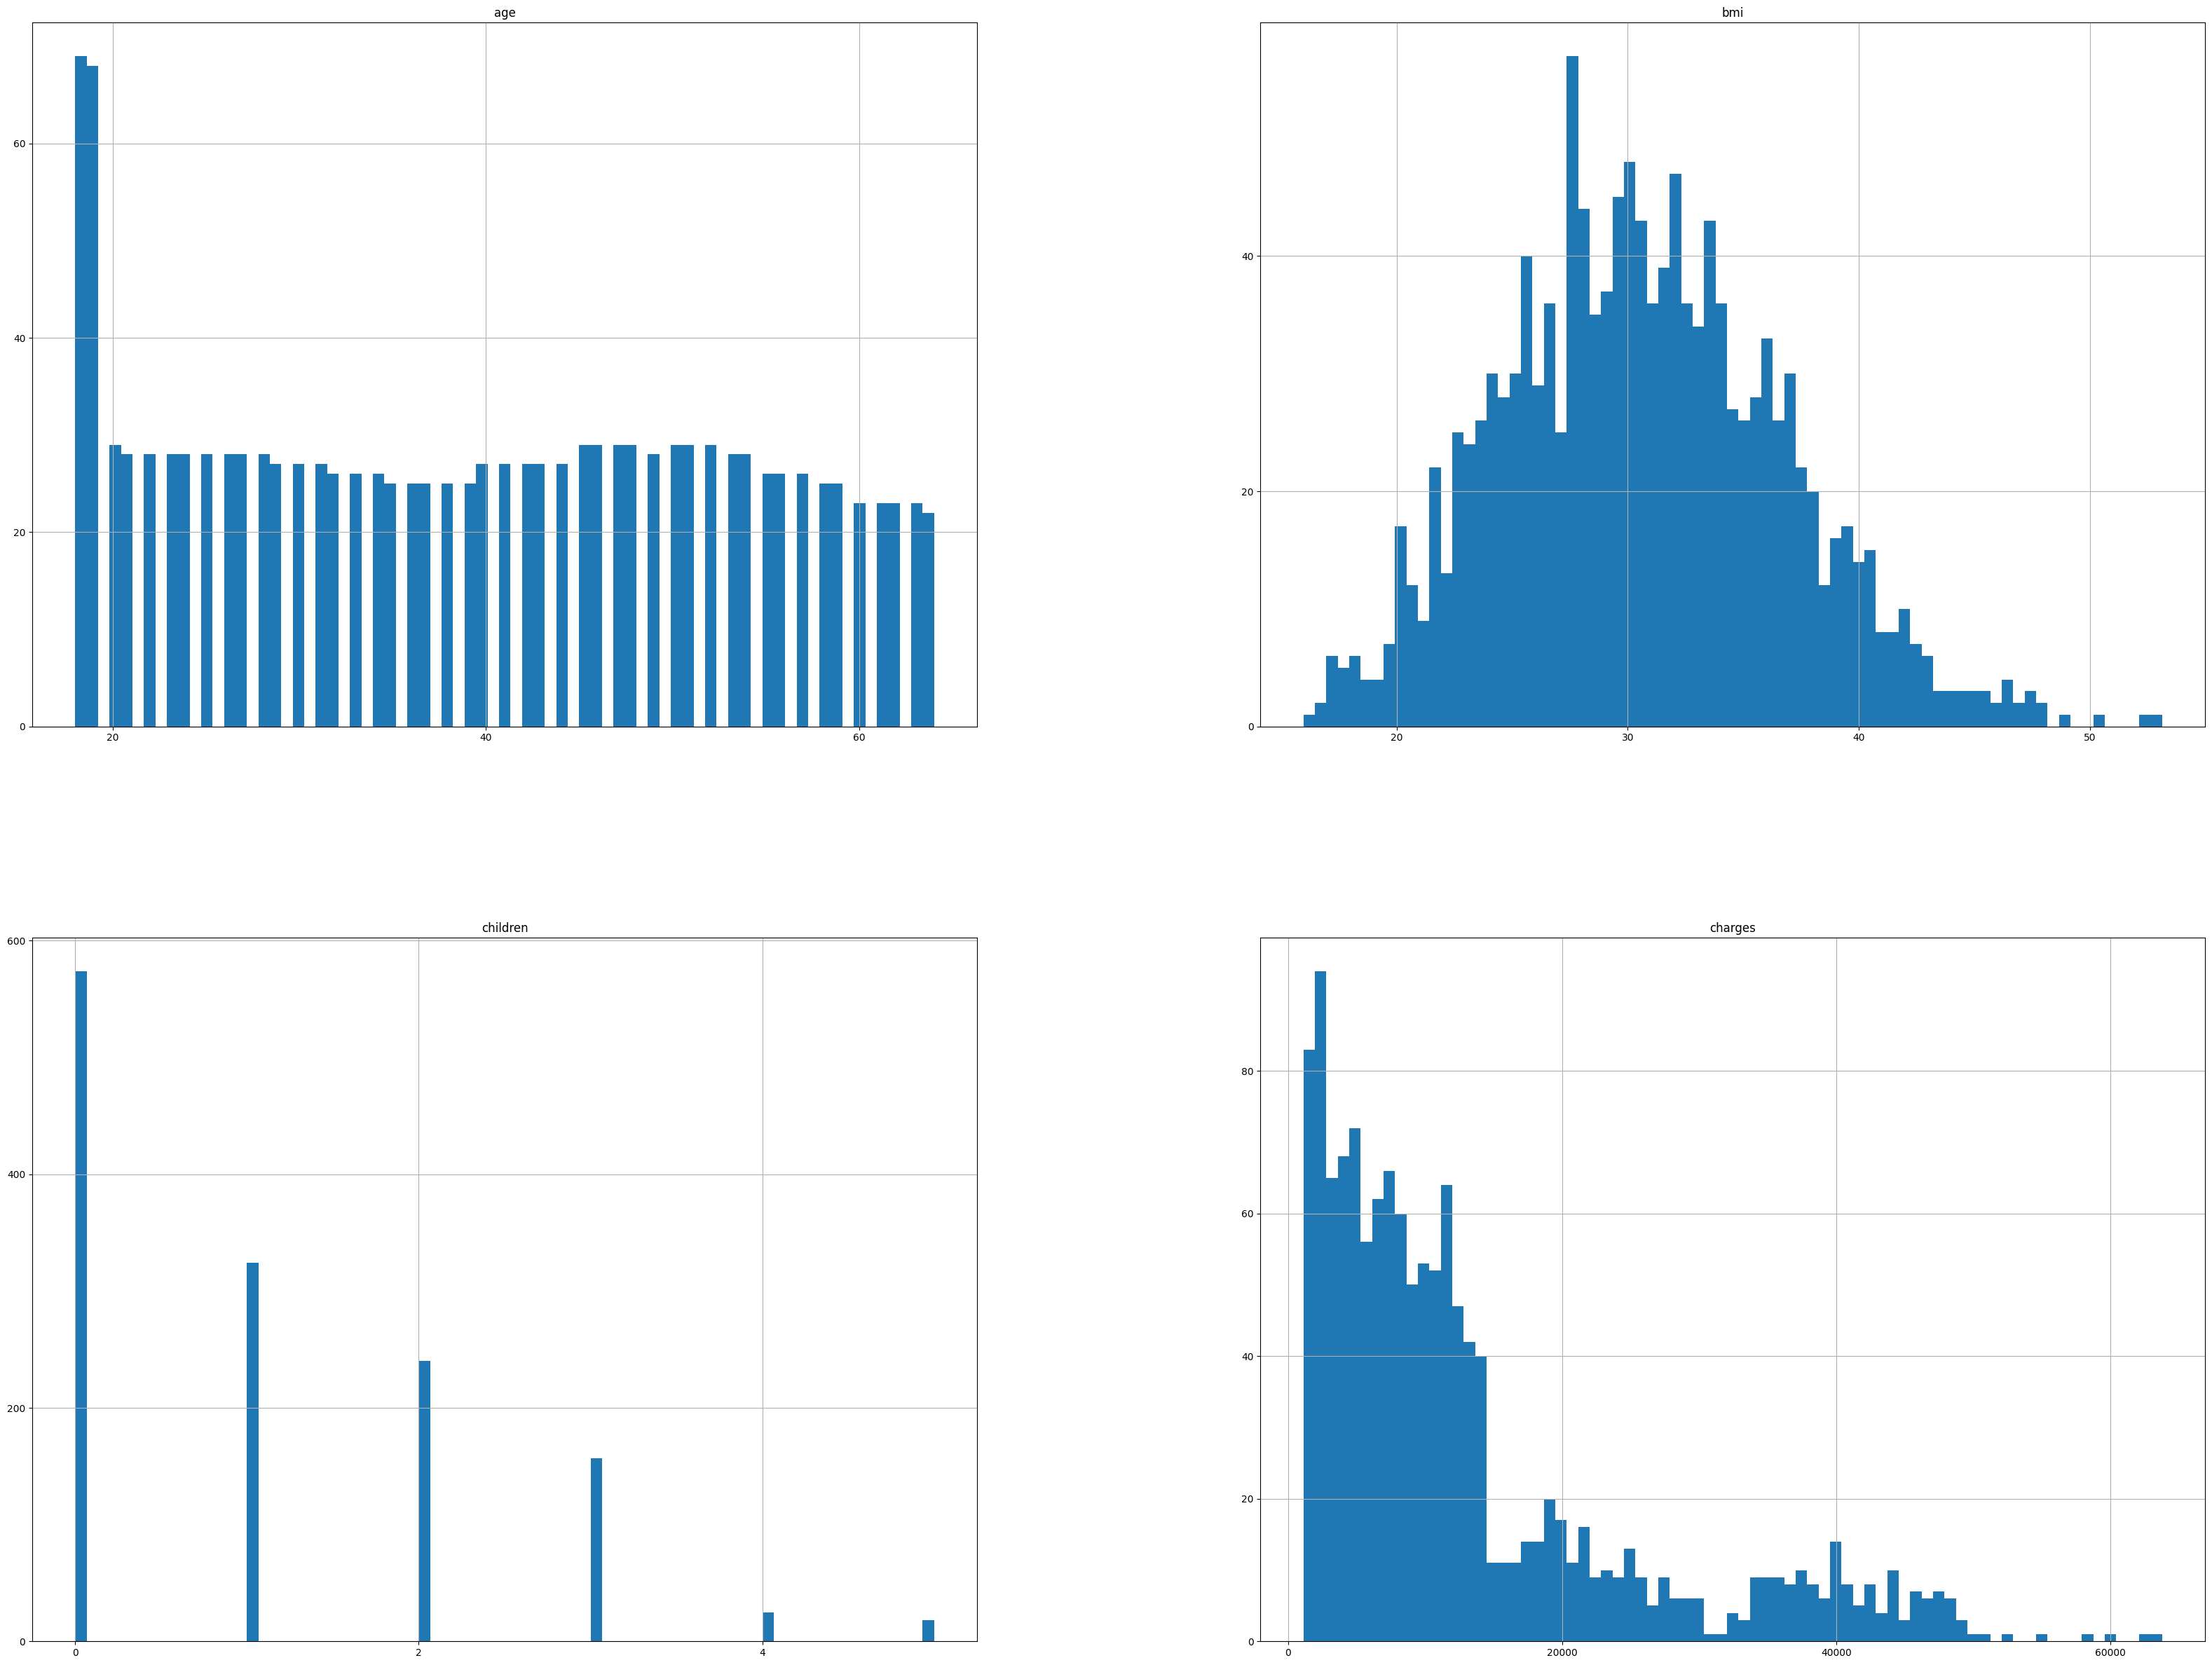

In [18]:
data.hist(bins=75, figsize=(40,30))
plt.rcParams.update({'font.size': 64})
plt.show()

Berikut merupakan histogram untuk setiap fitur numerik dalam dataset



---

Multivariate Analysis

---





```
Check Rata-rata charges terhadap masing-masing fitur
```



<ipython-input-19-ffb0fb64cd45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 10, aspect = 3,  data=data, palette="Set1")
<ipython-input-19-ffb0fb64cd45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 10, aspect = 3,  data=data, palette="Set1")
<ipython-input-19-ffb0fb64cd45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 10, aspect = 3,  data=data, palette="Set1")


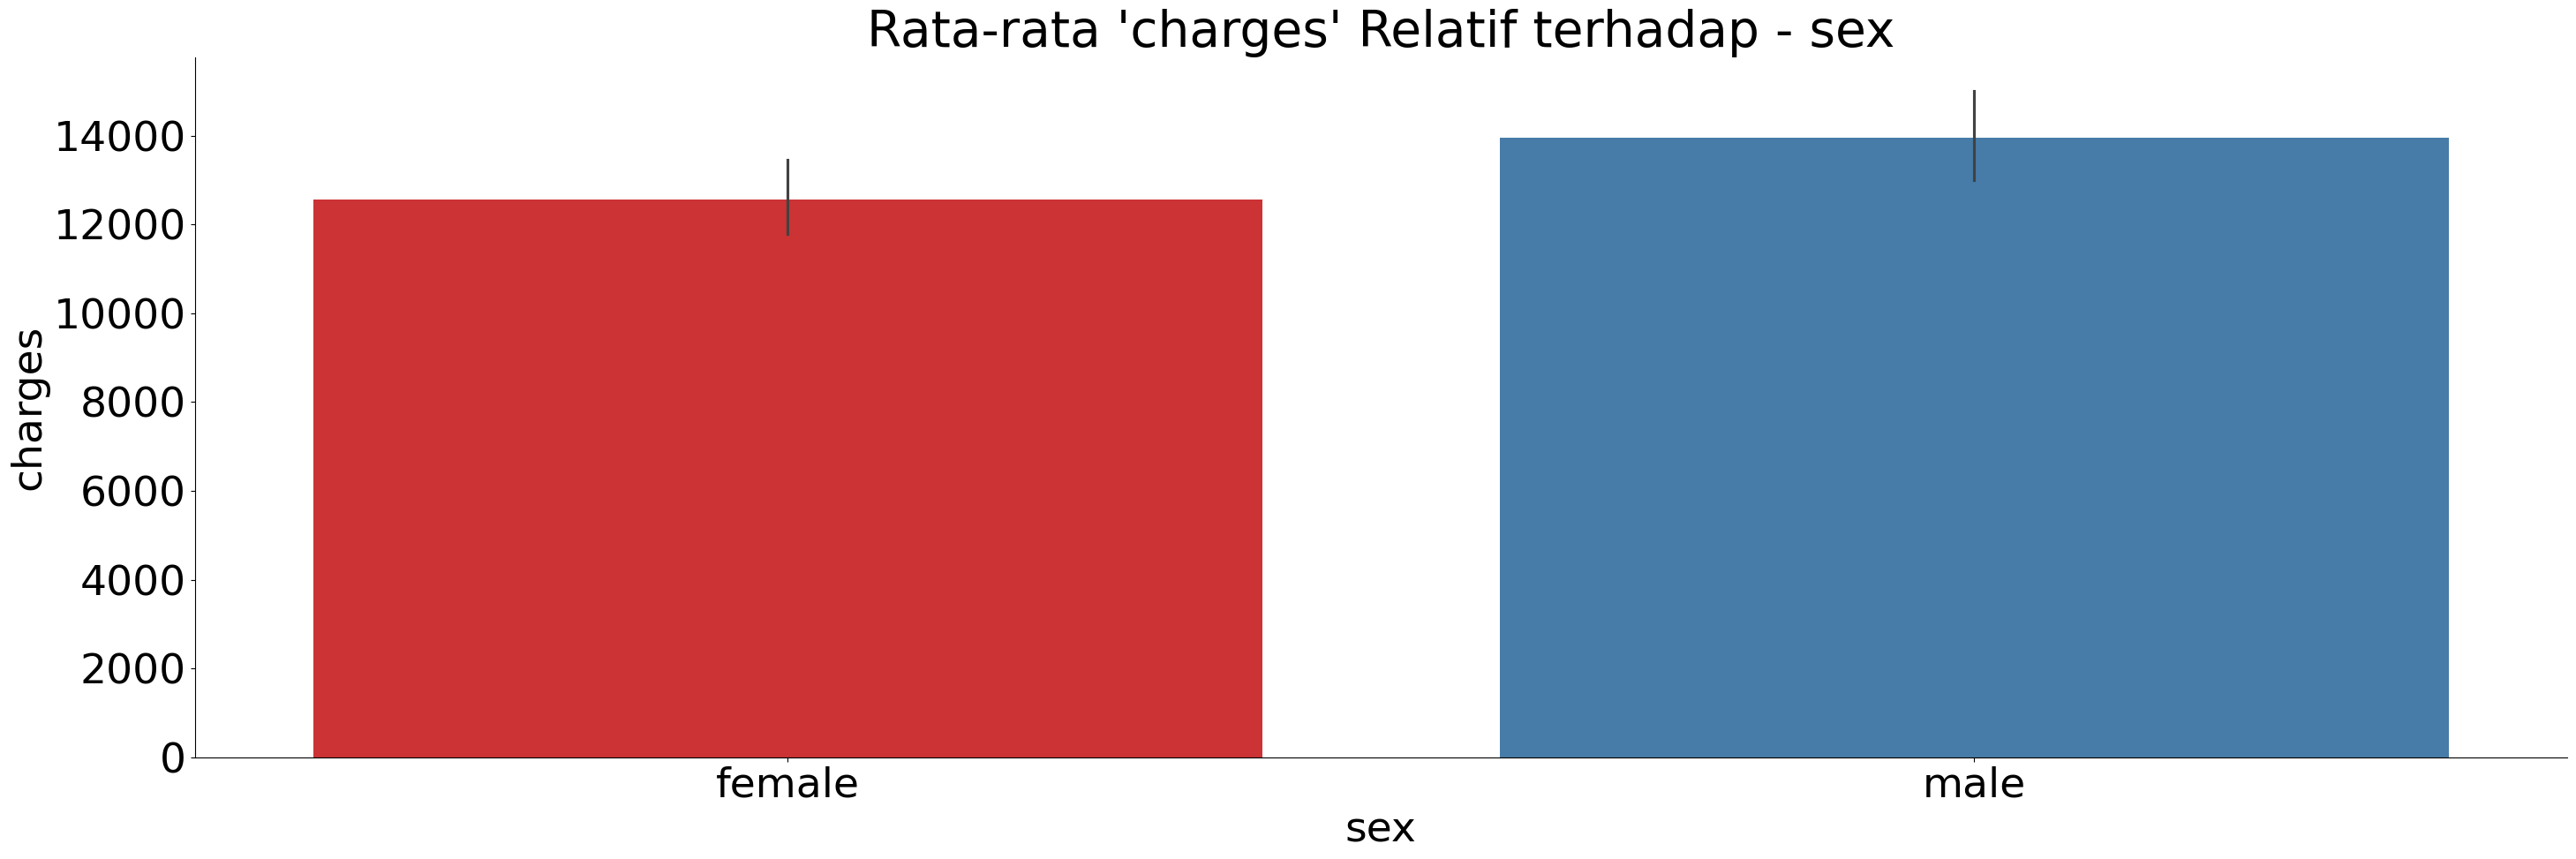

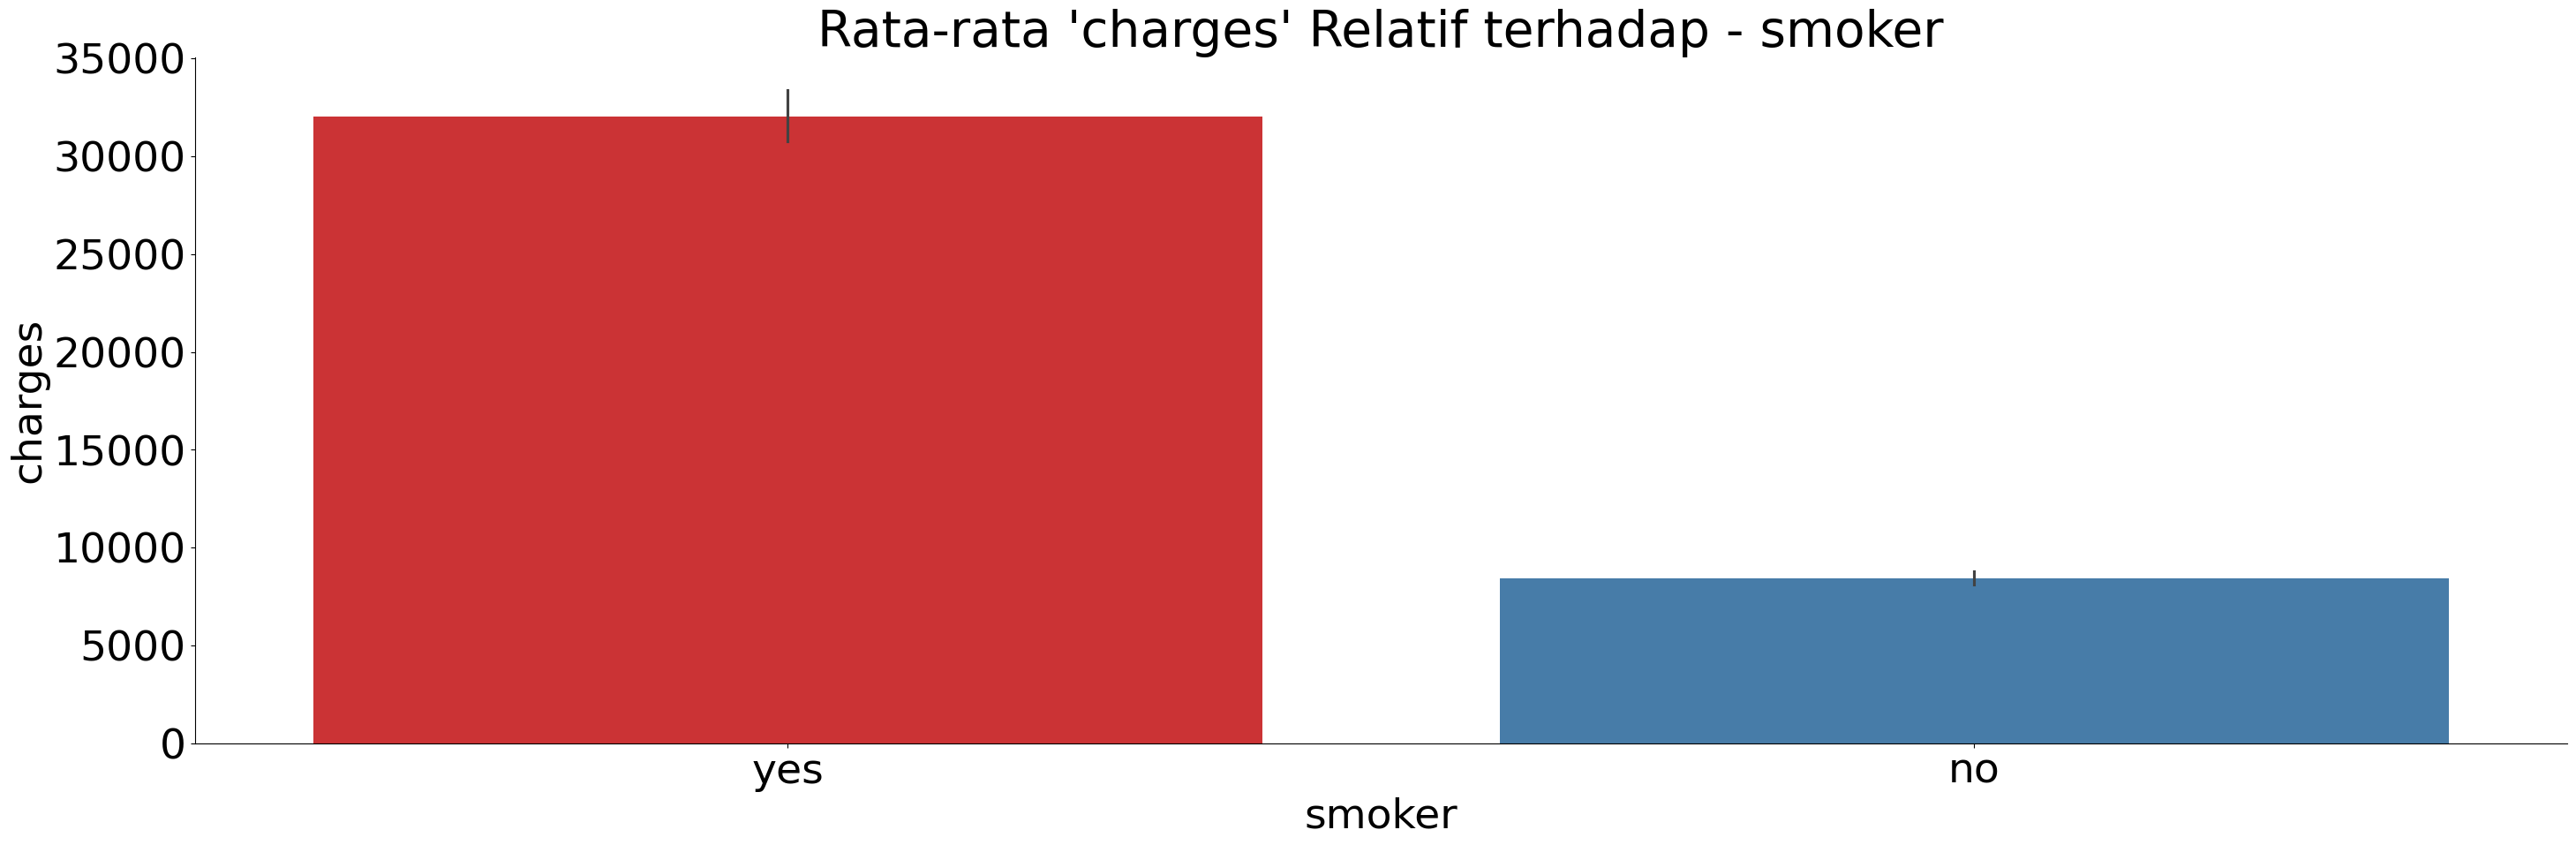

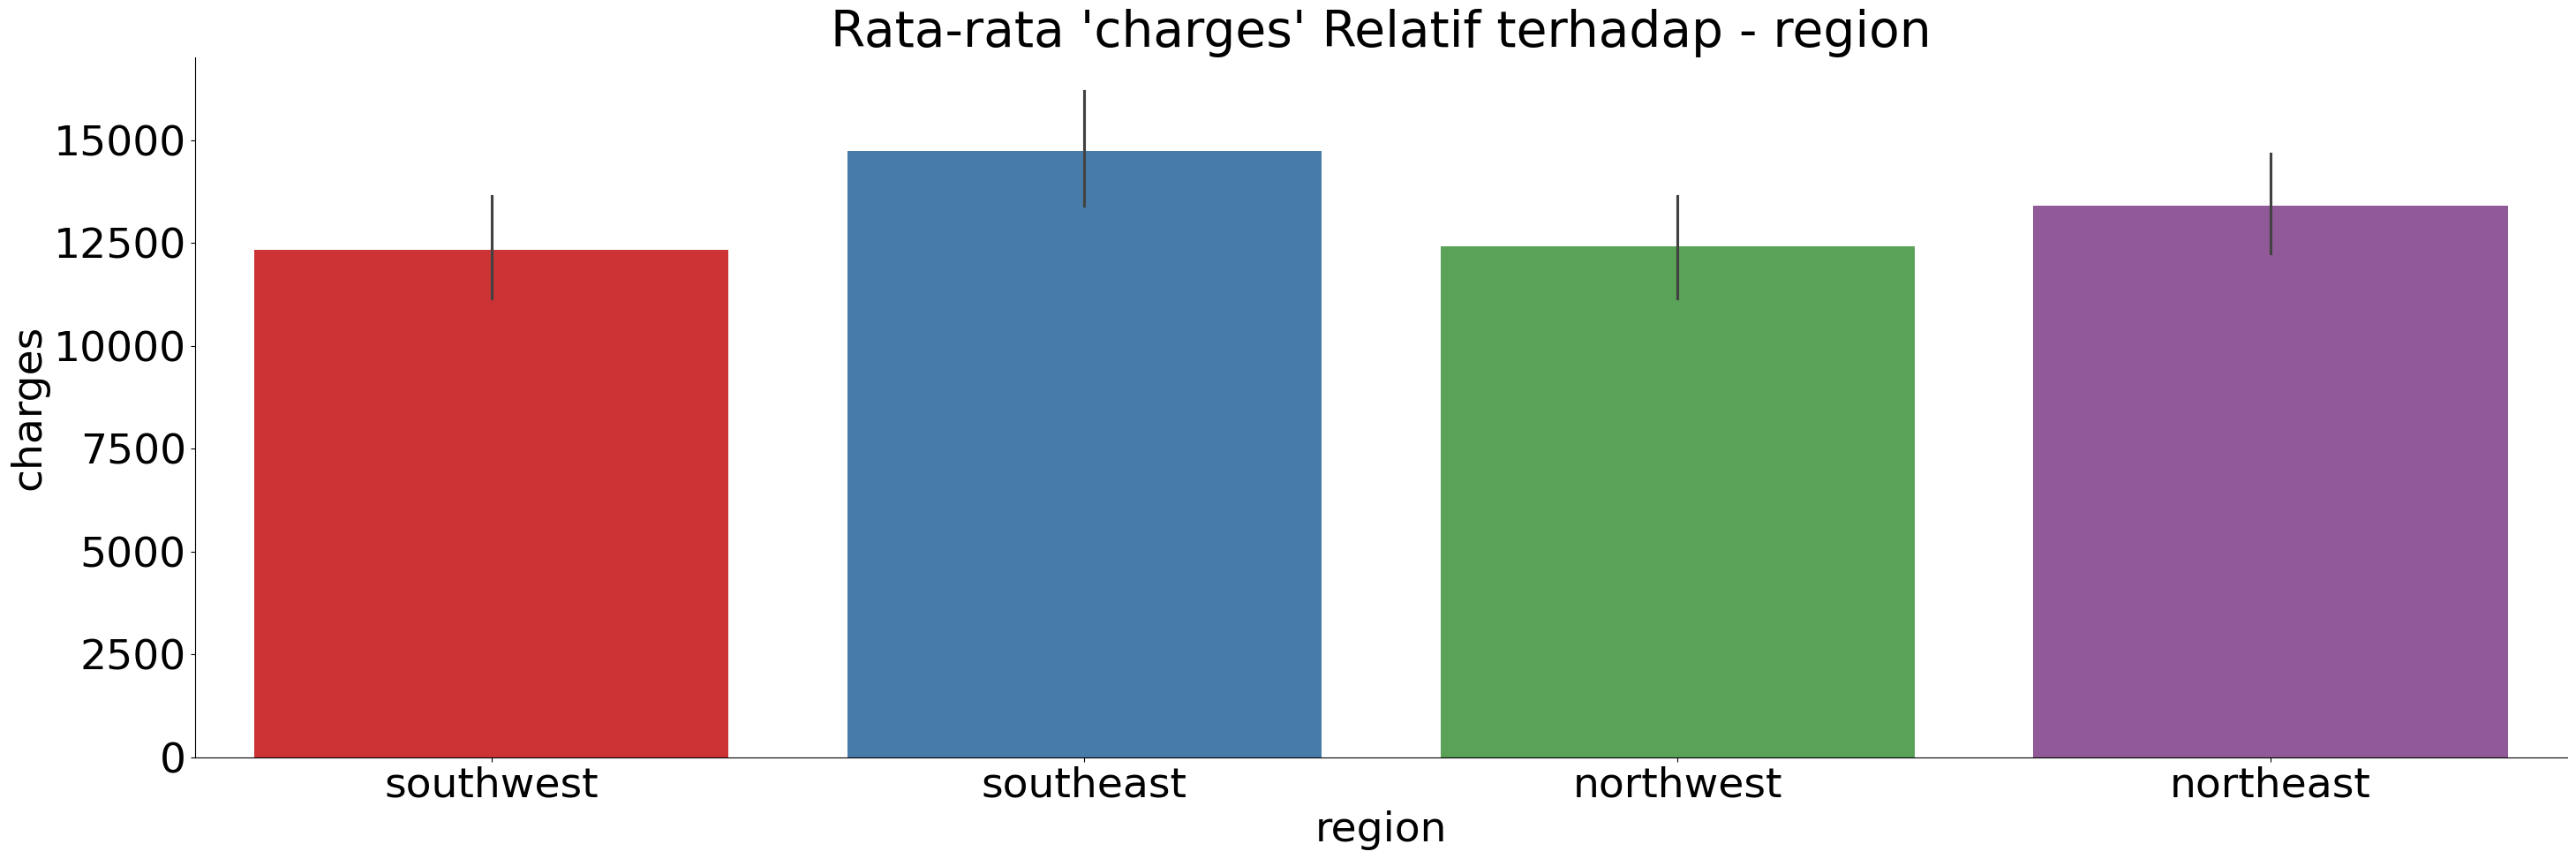

In [19]:
cat_features = data.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  plt.rcParams.update({'font.size': 34})
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 10, aspect = 3,  data=data, palette="Set1")
  plt.title("Rata-rata 'charges' Relatif terhadap - {}".format(col))

Berikut merupakan bar plot untuk setiap fitur kategorikal dalam dataset, menunjukkan rata-rata 'charges' relatif terhadap kategori tersebut



---

Numerical Features

---



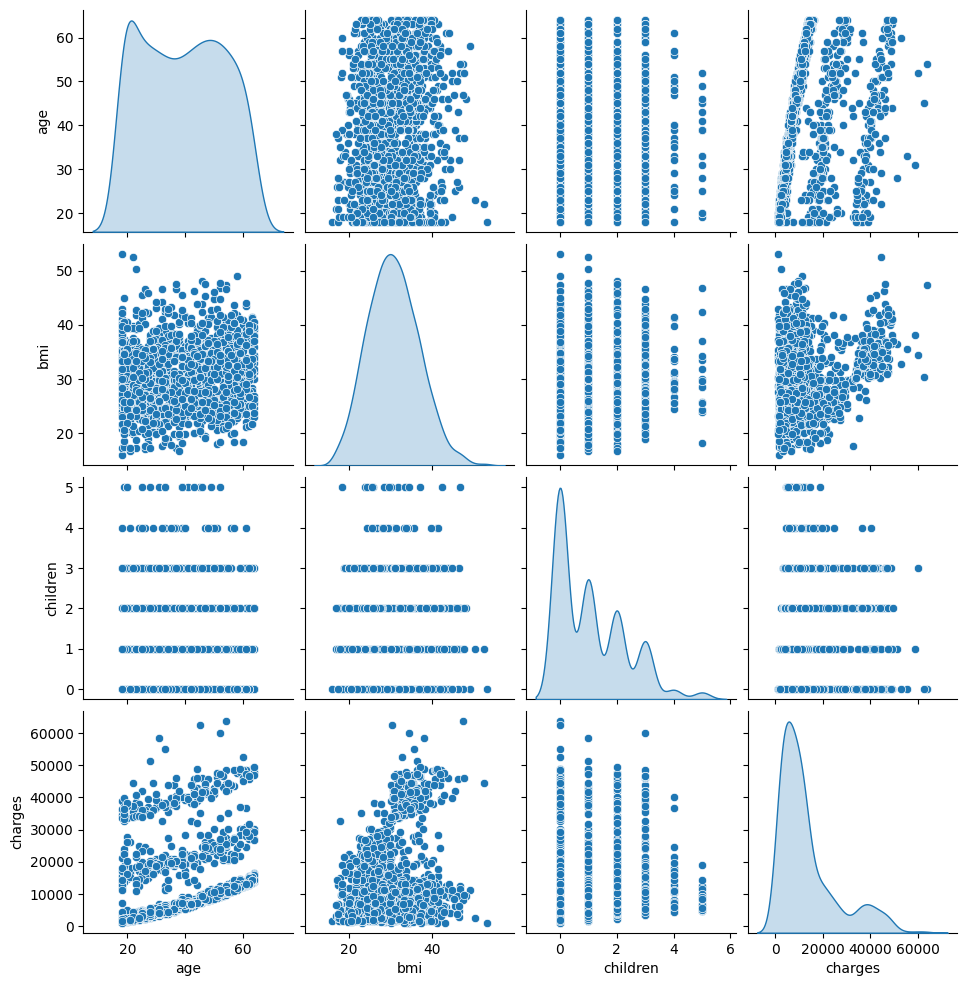

In [20]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
plt.rcParams.update({'font.size': 10})
sns.pairplot(data, diag_kind = 'kde')

Berikut merupakan visualisasi hubungan antar fitur numerik dalam dataset dengan menampilkan plot pasangan dari setiap kombinasi fitur.

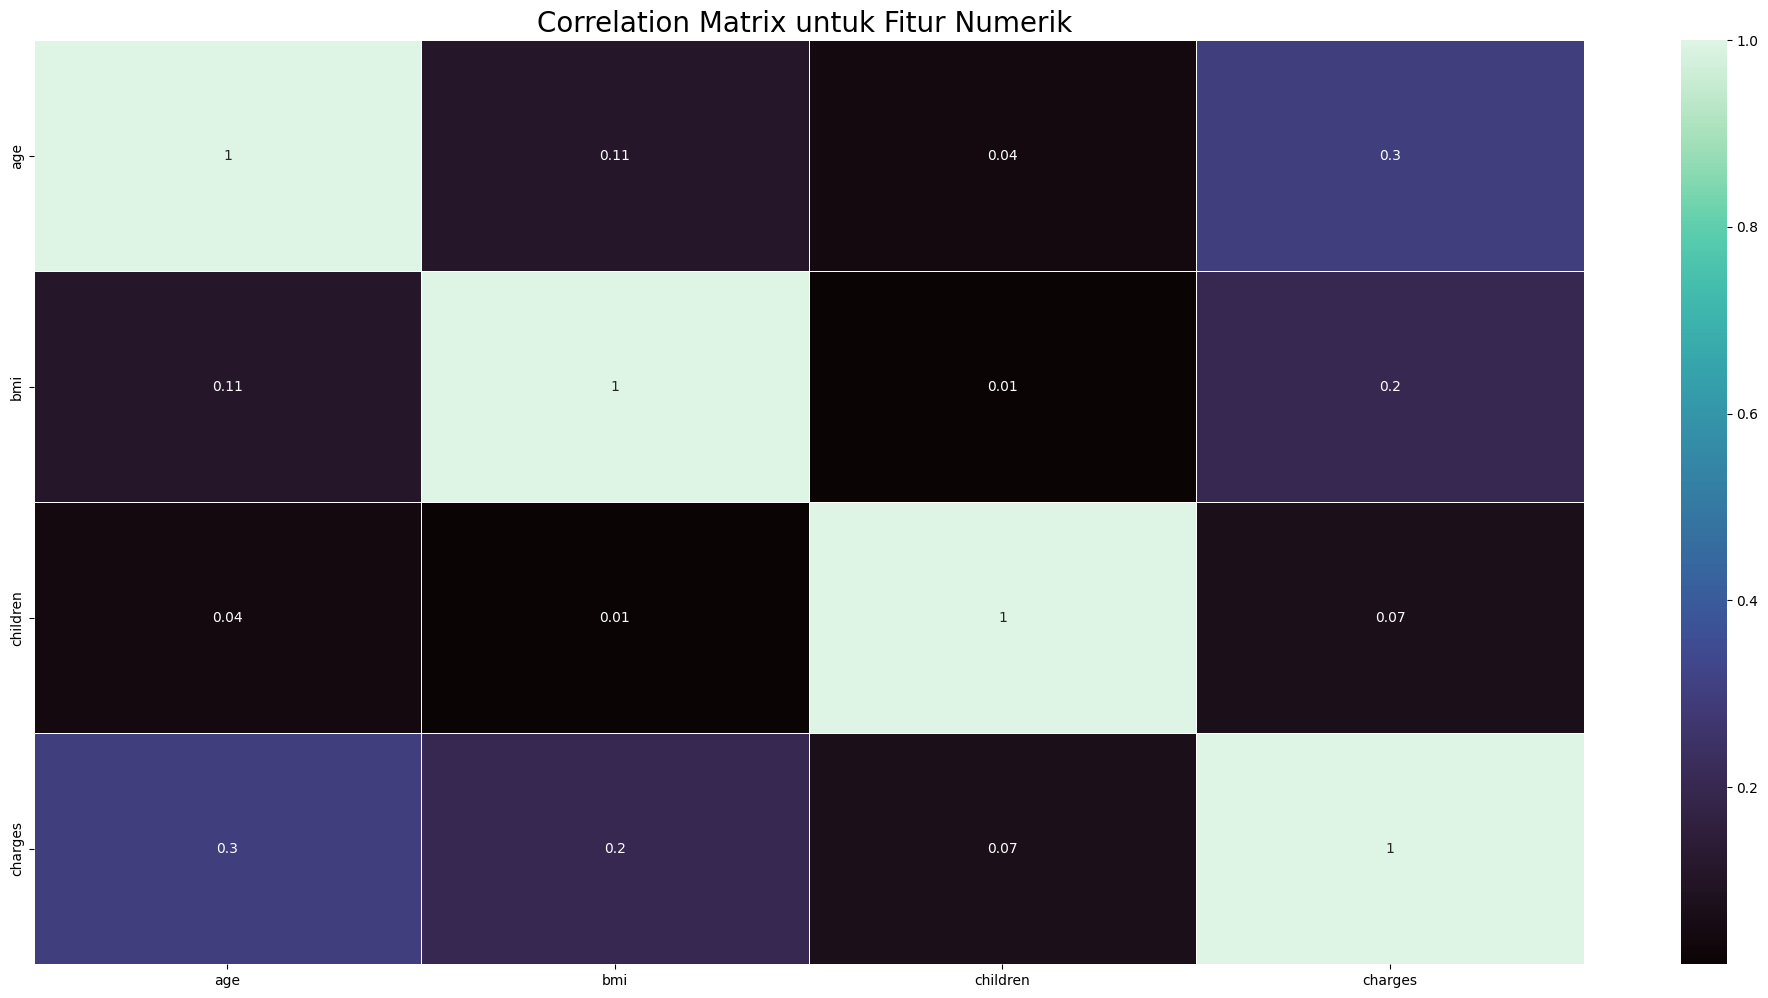

In [21]:
plt.figure(figsize=(25, 12))
correlation_matrix = data[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='mako', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.rcParams.update({'font.size': 40})



> Dari grafik kita dapat melihat bahwa semakin besar nilainya, maka akan semakin terang warna grafiknya. Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 maka korelasinya akan semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.



In [22]:
data.drop(['bmi'], inplace=True, axis=1)
data.head()

,age,sex,children,smoker,region,charges
0,19,female,0,yes,southwest,16884.92400
1,18,male,1,no,southeast,1725.55230
2,28,male,3,no,southeast,4449.46200
3,33,male,0,no,northwest,21984.47061
4,32,male,0,no,northwest,3866.85520




---
## **Data Preparation**
---






---
Encoding Fitur Kategori

---





In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   region    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


Berikut merupakan informasi terkait dataset

In [24]:
from sklearn.preprocessing import OneHotEncoder


OneHotEncoder dari sklearn.preprocessing digunakan untuk mengubah fitur kategorikal menjadi representasi numerik biner yang dapat digunakan dalam model machine learning.

In [25]:
data = pd.concat([data, pd.get_dummies(data['sex'], prefix='sex')],axis=1)
data = pd.concat([data, pd.get_dummies(data['smoker'], prefix='smoker')],axis=1)
data = pd.concat([data, pd.get_dummies(data['region'], prefix='region')],axis=1)
data.drop(['sex','smoker','region'], axis=1, inplace=True)

# Periksa tipe data sebelum konversi
print("Tipe data sebelum konversi:")
print(data.dtypes)

# Konversi kolom boolean menjadi integer
boolean_columns = data.select_dtypes(include=['bool']).columns
data[boolean_columns] = data[boolean_columns].astype(int)

# Periksa data dan tipe data setelah konversi
print("\nData setelah konversi:")
print(data.head())
print(data.dtypes)

Tipe data sebelum konversi:
age                   int64
children              int64
charges             float64
sex_female             bool
sex_male               bool
smoker_no              bool
smoker_yes             bool
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

Data setelah konversi:
   age  children      charges  sex_female  sex_male  smoker_no  smoker_yes  \
0   19         0  16884.92400           1         0          0           1   
1   18         1   1725.55230           0         1          1           0   
2   28         3   4449.46200           0         1          1           0   
3   33         0  21984.47061           0         1          1           0   
4   32         0   3866.85520           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1    

Kode tersebut digunakan untuk melakukan one-hot encoding pada kolom kategorikal 'sex', 'smoker', dan 'region', kemudian menghapus kolom aslinya untuk menggantinya dengan kolom hasil encoding. Selanjutnya, kode memeriksa dan mengonversi kolom boolean menjadi int64

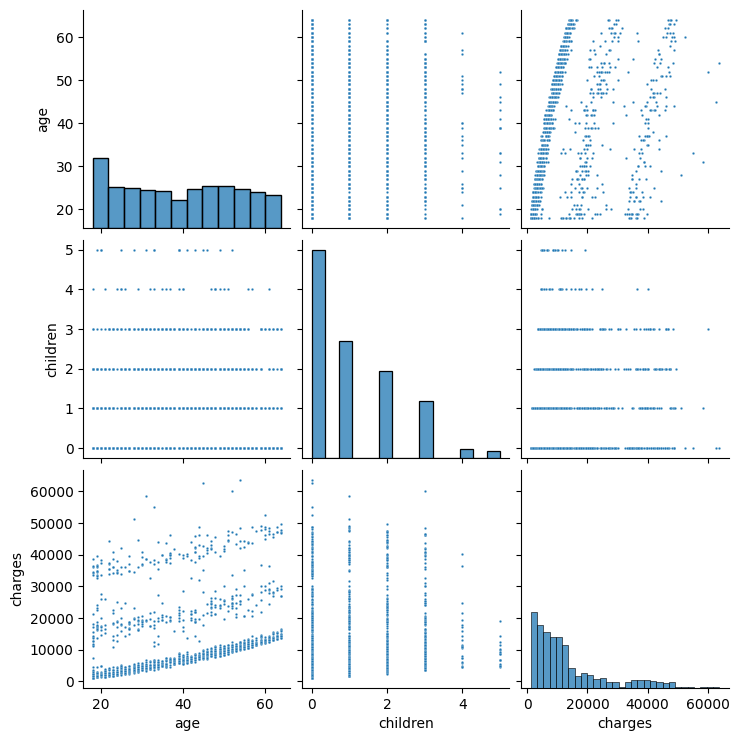

In [26]:
plt.rcParams.update({'font.size': 10})
sns.pairplot(data[['age','children','charges']], plot_kws={"s": 3});

Plot tersebut menggambarkan hubungan antara tiga variabel: age, children dan charges



---

Reduksi dimensi dengan Principal Component Analysis (PCA).

---



In [27]:
from sklearn.decomposition import PCA

Merupakan library yang digunakan untuk melakukan Principal Component Analysis (PCA)

In [28]:
pca = PCA(n_components=3, random_state=123)
pca.fit(data[['age','children','charges']])
princ_comp = pca.transform(data[['age','children','charges']])

Kode ini melakukan Principal Component Analysis (PCA) pada tiga fitur: age, children, dan charges, dengan mengatur jumlah komponen utama menjadi 3 dan menggunakan random_state 123 untuk reprodusibilitas.

In [29]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0.])

menunjukkan proporsi variansi yang dijelaskan oleh masing-masing komponen utama,



---
Pembagian dataset dengan fungsi train_test_split dari library sklearn

---




In [30]:
from sklearn.model_selection import train_test_split

merupakan library yang digunakan untuk melakukan split data

In [31]:
X = data.drop(["charges"],axis =1)
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

kode ini membagi dataset menjadi fitur X dan target y, kemudian memisahkannya menjadi data pelatihan dan data pengujian dengan proporsi 90% untuk pelatihan dan 10% untuk pengujian,

In [32]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1338
Total # of sample in train dataset: 1204
Total # of sample in test dataset: 134


menunjukan total sample data dan banyaknya sample di dataset train dan test



---
Standarisasi

---




In [33]:
from sklearn.preprocessing import StandardScaler

merupakan library yang digunakan untuk melakukan standarisasi fitur dengan mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1.

In [34]:
numerical_features = ['age', 'children']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age,children
1309,0.142309,0.751570
817,-1.138471,1.576446
671,-0.711544,-0.898184
249,-0.711544,-0.073307
981,-0.355772,-0.898184


kode tersebut digunakan untuk menstandarisasi fitur numerik 'age' dan 'children' dalam dataset pelatihan X_train agar memiliki rata-rata 0 dan deviasi standar 1

In [35]:
X_train[numerical_features].describe().round(4)

,age,children
count,1204.0000,1204.0000
mean,-0.0000,-0.0000
std,1.0004,1.0004
min,-1.4942,-0.8982
25%,-0.9250,-0.8982
50%,0.0000,-0.0733
75%,0.8539,0.7516
max,1.7789,3.2262


Kode ini menghasilkan deskripsi statistik ringkas dari fitur numerik 'age' dan 'children' di X_train

## **MODEL DEVELOPEMENT**



---
KNN

---




In [36]:
# Menyiapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Kode ini menyiapkan sebuah DataFrame kosong bernama models yang akan digunakan untuk menyimpan hasil analisis model, dengan baris-baris untuk MSE (Mean Squared Error) pada data pelatihan dan pengujian, serta kolom-kolom untuk tiga algoritma: KNN, RandomForest, dan Boosting.

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

melakukan import library

In [38]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Kode ini melatih model K-Nearest Neighbors (KNN) dengan 10 neighbors pada data pelatihan X_train dan y_train



---
Random Forest

---




In [39]:
from sklearn.ensemble import RandomForestRegressor

melakukab import library

In [40]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Kode ini melatih model RandomForestRegressor dengan 50 estimator dan kedalaman maksimum 16 pada data pelatihan X_train dan y_train



---
Boosting Algorithm

---




In [41]:
from sklearn.ensemble import AdaBoostRegressor

melakukan import library

In [42]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)


models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Kode ini melatih model AdaBoostRegressor dengan laju pembelajaran 0.05 pada data pelatihan X_train dan y_train. Setelah pelatihan, model digunakan untuk memprediksi nilai pada data pelatihan, dan MSE (Mean Squared Error) dari prediksi tersebut dihitung serta disimpan dalam DataFrame models pada baris 'train_mse' dan kolom 'Boosting'.



---
Evaluasi Model

---




In [43]:
# Melakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Kode ini melakukan standarisasi fitur numerik pada X_test dengan menggunakan scaler yang telah di-fit sebelumnya, sehingga fitur tersebut memiliki rata-rata 0 dan deviasi standar 1.

In [44]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,37258.694101,55548.010335
RF,12287.334325,53469.857574
Boosting,39623.832843,45342.940182


Berikut merupakan perhitungan masing-masing MSE pada setiap algoritma yang digunakan

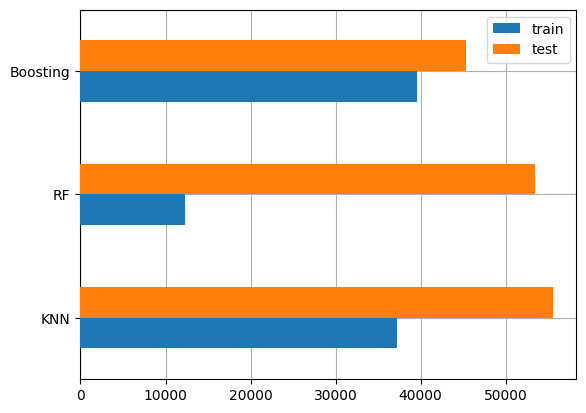

In [45]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berikut merupakan plot batang horizontal yang menampilkan nilai MSE untuk berbagai model berdasarkan nilai MSE pada data pengujian

In [46]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
650,9800.8882,9651.5,9756.6,12330.7




> Berdasarkan hasil prediksi tersebut, RF memberikan prediksi yang paling mendekati nilai sebenarnya (y_true). Sehingga model RF dapat digunakan sebagai model terbaik untuk melakukan prediksi medical charges

